# -----------------------------------  Leega Treinamentos ----------------------------------------

### CURSO - INTRODUÇÃO AO MACHINE LEARNING : CLASSIFICAÇÃO
### Murilo Fracaroli Ferreira

### ---------------------------------------------- SUMÁRIO DE DESENVOLVIMENTO ---------------------------------------------------------

#### 1 - Analisando e tratando os dados

#### (a) Analisando os tipos de variáveis e definindo nosso target.

#### (b) Verificando e tratando os valores nulos no dataset.

#### (c) Verificando a correlação dos dados

#### 2 - Preparando os dados

#### (a) Criando um dataframe para o nosso modelo

#### (b) Separando os dados de Treino e de teste

#### 3 - Modelagem e Validação dos dados

#### (a)  Criando a nossa DecisionTree

#### (b) Treinando o modelo e verificando a acurácia

#### (c) Aplicando o modelo nos dados de teste

#### 4 - Afiando nosso modelo

#### (a) Realizando Upsample do dataframe de treino

#### (b) Elaborando nosso novo dataframe

#### (c) Separando os novos dados de treino e de teste

#### 5 - Criando a nossa nova DecisionTree

#### (a) Criando novamente o modelo

#### (b) Treinando o novo modelo

#### (c) Aplicando o novo modelo nos dados de teste

## 1 - Analisando e tratando os dados

In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Carregando o dataset

data = pd.read_csv('data.csv', sep=',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 1 - (a) Analisando os tipos de variáveis e definindo nosso target

In [3]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

De acordo com o desafio apenas 29 destas colunas estão associadas com os materiais coletados.

A coluna "id" representa a identificação única de cada amostra.

A coluna "diagnostic" representa o output que estamos buscando (se o cancêr é benigno ou maligno).

A coluna "Unnamed: 32" provavelmente foi adicionada pelo fato do dataset apresentar colunas em branco.

In [4]:
# Realizando a contagem de valores malignos e benignos

contagem = pd.DataFrame(data['diagnosis'].value_counts())

# Transformando em porcentagem
percentil = pd.DataFrame(data['diagnosis'].value_counts(normalize=True)*100)

# Criando uma tabela com os valores
tabela = pd.concat([contagem, percentil], axis = 1)

# Definindo o nome das colunas
tabela.columns = ['# target', '% target']
tabela

,# target,% target
B,357,62.741652
M,212,37.258348


In [5]:
# Transformando nossa variável alvo em numérica
def corrige_target(S):
    if S == 'M':
        return 1
    elif S == 'B':
        return 0
    
data['diagnosis'] = data['diagnosis'].apply(corrige_target)


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

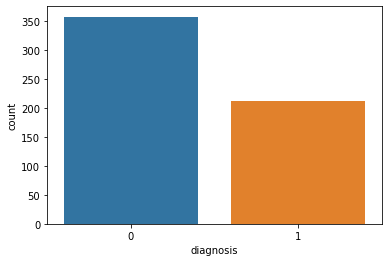

In [6]:
# Exibição do nosso target
sns.countplot(data['diagnosis'])

Pelo fato de termos mais registros do tipo benigno(0) do que maligno (1) talvez seja interessante realizarmos um upsample com o intuito de balancearmos o aprendizado do nosso modelo.
Vamos inicialmente realizar o treinamento do jeito que estão e depois comparamos a acurácia dos dois modelos.

In [7]:
# Definindo nosso alvo
target = data['diagnosis']

### 1 - (b) Verificando e tratando os valores nulos no dataset

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Removendo a coluna 'Unnamed:32'
data = data.drop(columns = ['Unnamed: 32'])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1 - (c) Verificando a correlação dos dados

In [10]:
corr = data.corr()
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


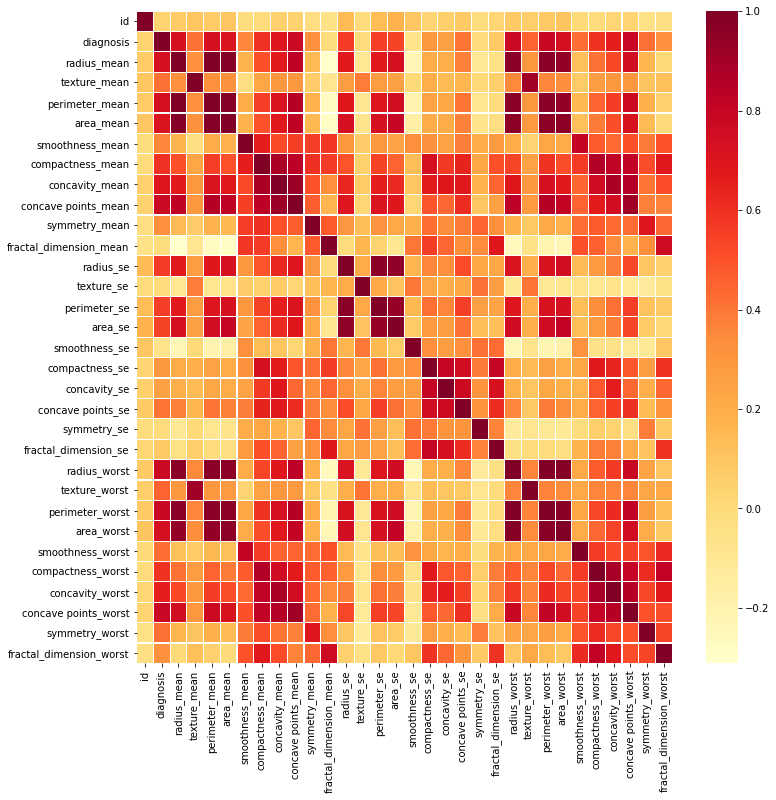

In [11]:
# Para facilitar a visualização criaremos um heatmap
corr = data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cmap = "YlOrRd", linewidths = .1)
plt.show()


## 2 - Preparando os dados

### (a) Criando um dataframe para o nosso modelo

In [12]:
# Apenas excluíremos as colunas irrelevantes mantendo o dataset original

dataframe = data.drop(columns = ['id'])
dataframe = dataframe.drop(columns = ['diagnosis'])


# Verificando o dataframe
dataframe.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Vou salvar o dataframe apenas por boa prática.

In [13]:
dataframe.to_csv('dataframe_original.csv', encoding = 'utf-8', index = False)

### (b) Separando os dados de Treino e de teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_all = dataframe
y_all = target

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.20, random_state = 79831)

print('Numero de observacoes do treino:', len(X_train))
print('Numero de observacoes da teste:', len(X_test))

Numero de observacoes do treino: 455
Numero de observacoes da teste: 114


## 3 - Modelagem e Validação dos resultados

### (a)  Criando a nossa DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [17]:
# sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

In [18]:
clf = DecisionTreeClassifier(random_state = 123, max_depth = 3, min_samples_leaf = 50)

### (b) Treinando o modelo e verificando a acurácia

In [19]:
modelo = clf.fit(X_train,y_train)

In [20]:
scores = cross_val_score(clf, X_train, y_train, cv = 5)
scores

array([0.94505495, 0.92307692, 0.85714286, 0.9010989 , 0.9010989 ])

In [21]:
importancia = clf.feature_importances_

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.06)


Nos dados de treino nosso modelo se saiu muito bem, apresentou uma acurácia de 91%, vamos verificar se isso se mantém aplicando - o nos dados de teste.

### (c) Aplicando o modelo nos dados de teste

In [23]:
y_predito = modelo.predict_proba(X_test)

In [24]:
modelo.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.12      , 0.88      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.50980392, 0.49019608],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.50980392, 0.49019608],
       [0.12      , 0.88      ],
       [1.        , 0.        ],
       [0.92      , 0.08      ],
       [0.        , 1.        ],
       [0.50980392, 0.49019608],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.12      , 0.88      ],
       [0.        , 1.        ],
       [0.50980392, 0.49019608],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.50980392, 0.49019608],
       [0.

In [25]:
y_predito = modelo.predict(X_test)
y_predito

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [26]:
acc_test = accuracy_score(y_test, y_predito)
print("Accuracy: %0.2f" % acc_test)

Accuracy: 0.91


Em geral, uma taxa de 91% de acertividade em um modelo de ML é muito bom. No entando, estamos trabalhando com modelos preditivos voltados à diagnósticos de câncer, neste caso, 9% de erro é uma taxa alta se pensarmos que a vida de alguém pode estar dependendo desse diagnótisco. Com isso em mente, vamos tentar aplicar outros parâmetros e técnicas para tentar chegar em uma acurácia maior. Vamos tentar agora aplicar o upsample no nosso dataset anterior.

## 4 - Afiando nosso modelo

### (a) Realizando Upsample do dataframe de treino

O intuito de realizarmos a técnica de Upsample é de que o nosso modelo aprenda a detectar igualmente diagnósticos positivos e negativos. Pelo fato de nosso dataframe conter mais diagnósticos do tipo benígno do que malígno, provavelmente nosso modelo aprendeu a detectar mais diagnósticos benígnos do que malígnos. Com o Upsample vamos igualar os dados de forma a eliminar essa diferença.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

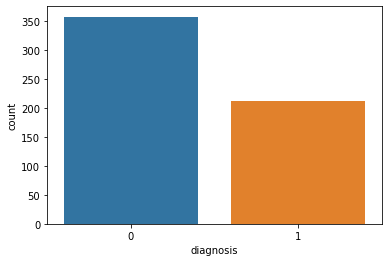

In [27]:
# Verificando o balanceamento da classe
sns.countplot(data['diagnosis'])

In [28]:
data.groupby(['diagnosis']).count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [29]:
# Definindo as classes

classe_majoritaria = data[data.diagnosis == 0]
classe_minoritaria = data[data.diagnosis == 1]

In [30]:
# Verificando as classes

classe_majoritaria.shape

(357, 32)

In [31]:
classe_minoritaria.shape

(212, 32)

In [32]:
# Realizando o upsample da classe minoritaria
from sklearn.utils import resample
classe_minoritaria_upsampled = resample(classe_minoritaria,
                                       replace = True,
                                       n_samples = 357,
                                       random_state = 150)

In [33]:
# Verificando a classe
classe_minoritaria_upsampled.shape

(357, 32)

In [34]:
# Concatenando nosso novo target
data = pd.concat([classe_majoritaria, classe_minoritaria_upsampled])

In [35]:
# Verificando nosso dataframe
data.diagnosis.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

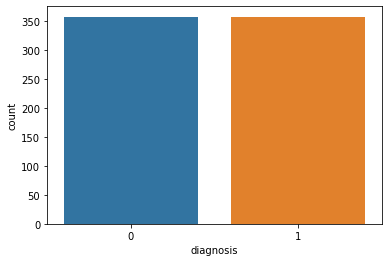

In [36]:
sns.countplot(data['diagnosis'])

In [37]:
# Salvando nossos dados modificados
data.to_csv('data_upsampled.csv', encoding = 'utf-8', index = False)

### (b) Elaborando nosso novo dataframe

Faremos exatamente o que havíamos feito no dataset anterior

In [38]:
# Removendo as colunas que não farão parte do treinamento
dataframe_upsampled = data.drop(columns = ['id'])
dataframe_upsampled = dataframe_upsampled.drop(columns = ['diagnosis'])
dataframe_upsampled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [39]:
# Definindo nosso novo target
target = data['diagnosis']

In [40]:
# Salvando o dataframe apenas por precaução
dataframe_upsampled.to_csv('dataframe_upsampled.csv', encoding = 'utf-8', index = False)

### (c) Separando os novos dados de treino e de teste

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_all = dataframe_upsampled
y_all = target

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.20, random_state = 79831)

print('Numero de observacoes do treino:', len(X_train))
print('Numero de observacoes da teste:', len(X_test))

Numero de observacoes do treino: 571
Numero de observacoes da teste: 143


## 5 - Criando a nossa nova DecisionTree

### (a) Criando novamente o modelo

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [44]:
clf = DecisionTreeClassifier(random_state = 123, max_depth = 3, min_samples_leaf = 50)

### (b) Treinando o novo modelo

In [45]:
modelo = clf.fit(X_train,y_train)

In [46]:
# Verificando a Acurácia do novo modelo
scores = cross_val_score(clf, X_train, y_train, cv = 5)
scores

array([0.90434783, 0.95614035, 0.9122807 , 0.92105263, 0.92105263])

In [47]:
importancia = clf.feature_importances_

In [48]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.04)


Usando apenas os dados de treino ja obtivemos um resultado satisfatório usando a nova técnica. Anteriormente nosso modelo havia obitido uma média de acurácia de 91%. Apesar de em teoria termos um ganho de somente 1%, conseguimos tambem reduzir a variação dessa média (antes sendo 0.06 partindo para 0.04) isso sim é muito significativo pois nos diz que temos uma variação menor (mais próxima a 92%) na nossa assertividade. Vamos ver como ele se sai com os dados de teste.

### (c) Aplicando o novo modelo nos dados de teste

In [50]:
y_predito = modelo.predict(X_test)
y_predito

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [51]:
acc_test = accuracy_score(y_test, y_predito)
print("Accuracy: %0.2f" % acc_test)

Accuracy: 0.94


Analisando nosso novo accuracy tivemos um ganho extremamente considerável levando em conta que apenas aplicamos a técnica de upsample. Quando se trata de assertividade, cada % a mais já conta. Talvez para aumentarmos ainda mais a performance do modelo necessitaríamos de uma database maior, dessa forma o modelo teria mais exemplos de aprendizado.